In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis

## Load Data

In [2]:
train_data = pd.read_csv("./Data/train.csv")
x_test = pd.read_csv("./Data/test.csv")
y_test = pd.read_csv("./Data/gender_submission.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

## Plot distribution of different key variables

### Fare

[]

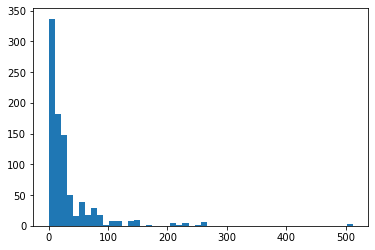

In [5]:
plt.hist(train_data["Fare"], bins=50)
plt.plot()

### Embarked

[]

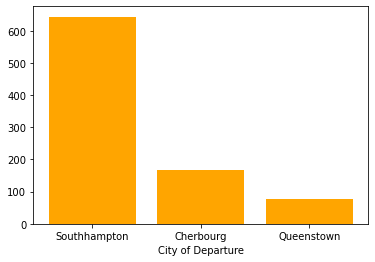

In [6]:
data = train_data["Embarked"].value_counts()
labels = ["Southhampton", "Cherbourg", "Queenstown"]
plt.xticks(range(len(labels)),labels)
plt.xlabel("City of Departure")
plt.bar(range(len(data)), data, color="orange")
plt.plot()

### Age

[]

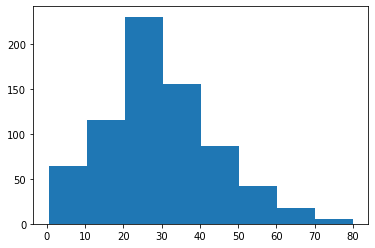

In [7]:
plt.hist(train_data["Age"],bins=8)
plt.plot()

### Gender

[]

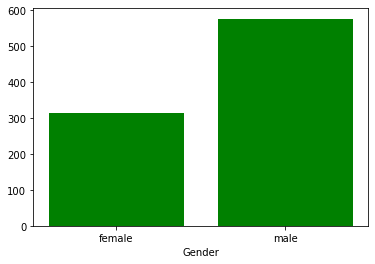

In [8]:
female_passengers = len(train_data[train_data["Sex"]=="female"])
male_passengers = len(train_data[train_data["Sex"]=="male"])
data = [female_passengers,male_passengers]
labels = ["female", "male"]
plt.xticks(range(len(labels)),labels)
plt.xlabel("Gender")
plt.bar(range(len(data)), data, color="green")
plt.plot()

### Pasenger Class

[]

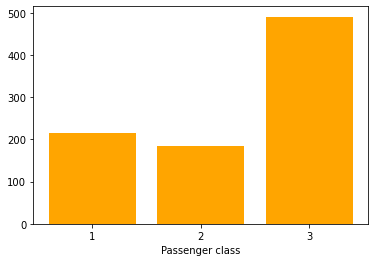

In [9]:
data = train_data["Pclass"].value_counts(sort=False)

labels = [1,2,3]
plt.xticks(range(len(labels)),labels)
plt.xlabel("Passenger class")
plt.bar(range(len(data)), data, color="orange")
plt.plot()

### Survived

[]

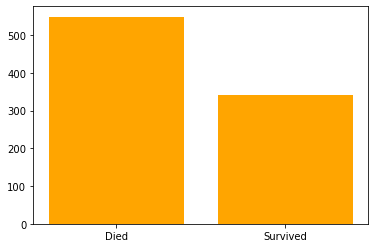

In [10]:
data = train_data["Survived"].value_counts(sort=False)

labels = ["Died", "Survived"]
plt.xticks(range(len(labels)),labels)
plt.bar(range(len(data)), data, color="orange")
plt.plot()

## Data Cleaning and Transformation
To clean the data we will first have a look at statistically significant variables

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder = LabelEncoder()
train_data["SexTransformed"] = labelencoder.fit_transform(train_data["Sex"])
train_data["EmbarkedTransformed"] = labelencoder.fit_transform(train_data["Embarked"])
train_data["TicketTransformed"] = labelencoder.fit_transform(train_data["Ticket"])
train_data["CabinTransformed"] = labelencoder.fit_transform(train_data["Cabin"])

In [13]:
x_test["SexTransformed"] = labelencoder.fit_transform(x_test["Sex"])
x_test["EmbarkedTransformed"] = labelencoder.fit_transform(x_test["Embarked"])
x_test["TicketTransformed"] = labelencoder.fit_transform(x_test["Ticket"])
x_test["CabinTransformed"] = labelencoder.fit_transform(x_test["Cabin"])

In [14]:
train_data.corr()["Survived"]

PassengerId           -0.005007
Survived               1.000000
Pclass                -0.338481
Age                   -0.077221
SibSp                 -0.035322
Parch                  0.081629
Fare                   0.257307
SexTransformed        -0.543351
EmbarkedTransformed   -0.163517
TicketTransformed     -0.164549
CabinTransformed      -0.254888
Name: Survived, dtype: float64

### Insights
The correlation between the given variables and the target variable ("Survived") shows that a passenger's gender,the class he/she traveled in and his/her fare heavily influenced his/her chance of survival. Whether he/she traveled with his/her family or not is only slightly relevant for the classification. Interestingly, their city of departure seems to be statistically relevant :)

### Drop irrelevant columns

In [15]:
train_data = train_data.drop(['PassengerId','Sex','Name','Embarked','Cabin','Ticket'],axis=1)
y_train = train_data["Survived"]
x_train = train_data.drop(["Survived"], axis=1)
x_test = x_test.drop(['PassengerId','Sex','Name','Embarked','Cabin','Ticket'],axis=1)
y_test = y_test.drop(columns=["PassengerId"])

### Remove NaNs

In [16]:
x_train["Age"] = x_train["Age"].replace(np.NaN,x_train["Age"].mean())

In [17]:
x_test["Age"] = x_test["Age"].replace(np.NaN,x_train["Age"].mean())
x_test["Fare"] = x_test["Fare"].replace(np.NaN,x_train["Fare"].mean())

In [18]:
x_test

,Pclass,Age,SibSp,Parch,Fare,SexTransformed,EmbarkedTransformed,TicketTransformed,CabinTransformed
0,3,34.500000,0,0,7.8292,1,1,152,76
1,3,47.000000,1,0,7.0000,0,2,221,76
2,2,62.000000,0,0,9.6875,1,1,73,76
3,3,27.000000,0,0,8.6625,1,2,147,76
4,3,22.000000,1,1,12.2875,0,2,138,76
...,...,...,...,...,...,...,...,...,...
413,3,29.699118,0,0,8.0500,1,2,267,76
414,1,39.000000,0,0,108.9000,0,0,324,22
415,3,38.500000,0,0,7.2500,1,2,346,76
416,3,29.699118,0,0,8.0500,1,2,220,76


## Test some models

### Decision tree

In [19]:
from sklearn import tree

In [20]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [21]:
clf.score(x_test,y_test)

0.6100478468899522

### Support Vector Machine

In [22]:
from sklearn import svm

In [23]:
clf = svm.SVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.49760765550239233